In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from analysis_utils import get_df, inspect_model_by_name

In [2]:
identifier = '*'
df = get_df(identifier)
print('before filtering, there are a total of', len(df), 'models')

{'batch_norm': '0',
 'batch_size': '32',
 'conv1_dropout': '0.0',
 'conv1_kernel_size': '26',
 'conv1_num_kernels': '27',
 'conv1_stride': '1',
 'conv2_dropout': '0.4656630640339533',
 'conv2_kernel_size': '19',
 'conv2_num_kernels': '38',
 'conv2_stride': '1',
 'cost_function': 'MSE',
 'cuda': '1',
 'data_is_target': '0',
 'data_noise_gaussian': '1',
 'data_train': '/home/chenz28/Downloads/20180402_L74_70mm/train_3.h5',
 'data_val': '/home/chenz28/Downloads/20180402_L74_70mm/val_3.h5',
 'fcs_dropout': '0.4632592274978161',
 'fcs_hidden_size': '418',
 'fcs_num_hidden_layers': '2',
 'input_size': '65',
 'k': '4',
 'learning_rate': '0.006969683588887574',
 'momentum': '0.989472849939695',
 'optimizer': 'SGD',
 'output_size': '130',
 'patience': '20',
 'pool1_kernel_size': '2',
 'pool1_stride': '2',
 'pool2_kernel_size': '2',
 'pool2_stride': '2',
 'pooling_method': 'max',
 'save_dir': 'DNNs/20180718164411_34_created/k_4',
 'save_initial': '0',
 'use_pooling': '1',
 'weight_decay': '0'}


/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


before filtering, there are a total of 384 models


# (TODO) Filtering: Only Consider Internally Consistent (5 targets all better than DAS)

In [19]:
list(df)

['input_size',
 'output_size',
 'batch_norm',
 'use_pooling',
 'pooling_method',
 'conv1_kernel_size',
 'conv1_num_kernels',
 'conv1_stride',
 'conv1_dropout',
 'pool1_kernel_size',
 'pool1_stride',
 'conv2_kernel_size',
 'conv2_num_kernels',
 'conv2_stride',
 'conv2_dropout',
 'pool2_kernel_size',
 'pool2_stride',
 'fcs_hidden_size',
 'fcs_num_hidden_layers',
 'fcs_dropout',
 'cost_function',
 'optimizer',
 'learning_rate',
 'momentum',
 'data_is_target',
 'data_train',
 'data_val',
 'batch_size',
 'data_noise_gaussian',
 'weight_decay',
 'patience',
 'cuda',
 'save_initial',
 'k',
 'save_dir',
 'name',
 'loss_val_k_3',
 'loss_val_k_4',
 'loss_val_k_5',
 'target_in_vivo_target_17_cr_das',
 'target_in_vivo_target_17_cr_dnn',
 'target_in_vivo_target_17_cnr_das',
 'target_in_vivo_target_17_cnr_dnn',
 'target_in_vivo_target_17_snr_das',
 'target_in_vivo_target_17_snr_dnn',
 'target_in_vivo_target_17_mean_in_das',
 'target_in_vivo_target_17_mean_in_dnn',
 'target_in_vivo_target_17_mean_out

# Filter: Only Consider Externally Consistent (3 experiments all better than DAS, on average)

In [18]:
df = df.query('target_anechoic_cyst_5mm_avg_cnr_dnn >= target_anechoic_cyst_5mm_avg_cnr_das & \
               target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn >= target_phantom_anechoic_cyst_2p5mm_avg_cnr_das & \
               target_in_vivo_avg_cnr_dnn >= target_in_vivo_avg_cnr_das')

# Filter by Less or Equal SNR

In [4]:
# tolerance = 1.0
df = df.query('target_anechoic_cyst_5mm_avg_snr_dnn <= target_anechoic_cyst_5mm_avg_snr_das + 1.0 & \
               target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn <= target_phantom_anechoic_cyst_2p5mm_avg_snr_das + 1.0 & \
               target_in_vivo_avg_snr_dnn <= target_in_vivo_avg_snr_das + 1.0')

# CNR Distribution: Simulation, Phantom, and In Vivo

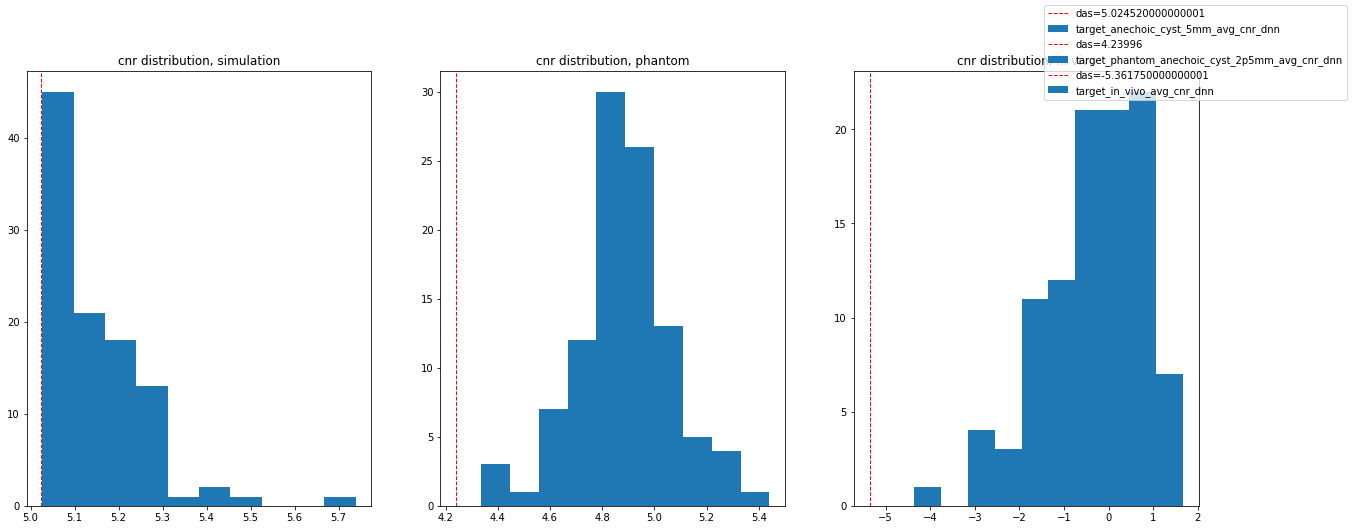

In [5]:
import random 
random_row = random.choice(df.index)

cnr_simulation_das = df.loc[random_row, 'target_anechoic_cyst_5mm_avg_cnr_das']
fig, axes = plt.subplots(1, 3, figsize=(21,8))
axes[0].hist(df['target_anechoic_cyst_5mm_avg_cnr_dnn'])
axes[0].axvline(cnr_simulation_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_simulation_das))
axes[0].set_title('cnr distribution, simulation')

cnr_phantom_das = df.loc[random_row, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_das']
axes[1].hist(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'])
axes[1].axvline(cnr_phantom_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_phantom_das))
axes[1].set_title('cnr distribution, phantom')

cnr_in_vivo_das = df.loc[random_row, 'target_in_vivo_avg_cnr_das']
axes[2].hist(df['target_in_vivo_avg_cnr_dnn'])
axes[2].axvline(cnr_in_vivo_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_in_vivo_das))
axes[2].set_title('cnr distribution, in vivo')

# TODO: DNNs
# axes[1, 0].hist(df['target_anechoic_cyst_5mm_avg_cnr_dnn'])
# axes[1, 0].axvline(cnr_simulation_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_simulation_das))
# axes[1, 0].set_title('cnr distribution, simulation')

# cnr_phantom_das = df.loc[0, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_das']
# axes[1, 1].hist(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'])
# axes[1, 1].axvline(cnr_phantom_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_phantom_das))
# axes[1, 1].set_title('cnr distribution, phantom')

# cnr_in_vivo_das = df.loc[0, 'target_in_vivo_avg_cnr_das']
# axes[1, 2].hist(df['target_in_vivo_avg_cnr_dnn'])
# axes[1, 2].axvline(cnr_in_vivo_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_in_vivo_das))
# axes[1, 2].set_title('cnr distribution, in vivo')


fig.legend()
plt.show()

# CNR Correlation: Simulation vs Phantom vs In Vivo

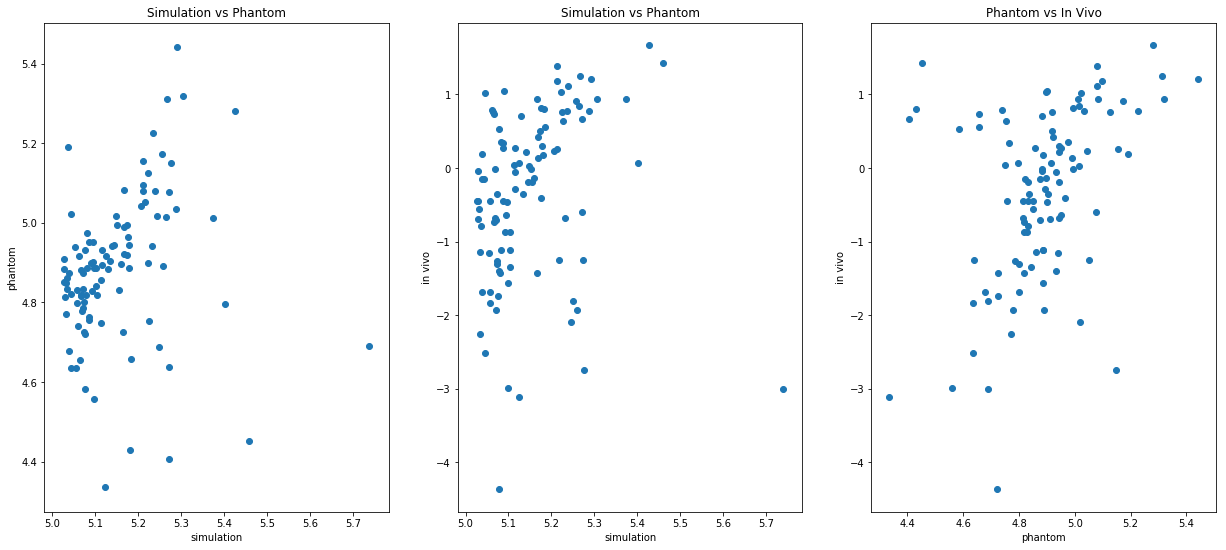

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(21, 9))

axes[0].scatter(df['target_anechoic_cyst_5mm_avg_cnr_dnn'], df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'])
axes[0].set_xlabel('simulation')
axes[0].set_ylabel('phantom')
axes[0].set_title('Simulation vs Phantom')

axes[1].scatter(df['target_anechoic_cyst_5mm_avg_cnr_dnn'], df['target_in_vivo_avg_cnr_dnn'])
axes[1].set_xlabel('simulation')
axes[1].set_ylabel('in vivo')
axes[1].set_title('Simulation vs Phantom')

axes[2].scatter(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'], df['target_in_vivo_avg_cnr_dnn'])
axes[2].set_xlabel('phantom')
axes[2].set_ylabel('in vivo')
axes[2].set_title('Phantom vs In Vivo')

plt.show()

# CNR vs Loss

# Speckle SNR vs Loss

# CNR vs Hyperparams

# Find Max CNR Row

In [7]:
print(df.loc[df['target_anechoic_cyst_5mm_avg_cnr_dnn'].idxmax()]['name']) # simulation
print(df.loc[df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'].idxmax()]['name']) # phantom
print(df.loc[df['target_in_vivo_avg_cnr_dnn'].idxmax()]['name']) # in vivo


20180730110542_4_evaluated
20180928201821_37_evaluated
20180928201821_31_evaluated


# CNR vs SNR

In [8]:
def label_point(df, x, y, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in df.iterrows():
        ax.text(point[x], point[y], str(i))

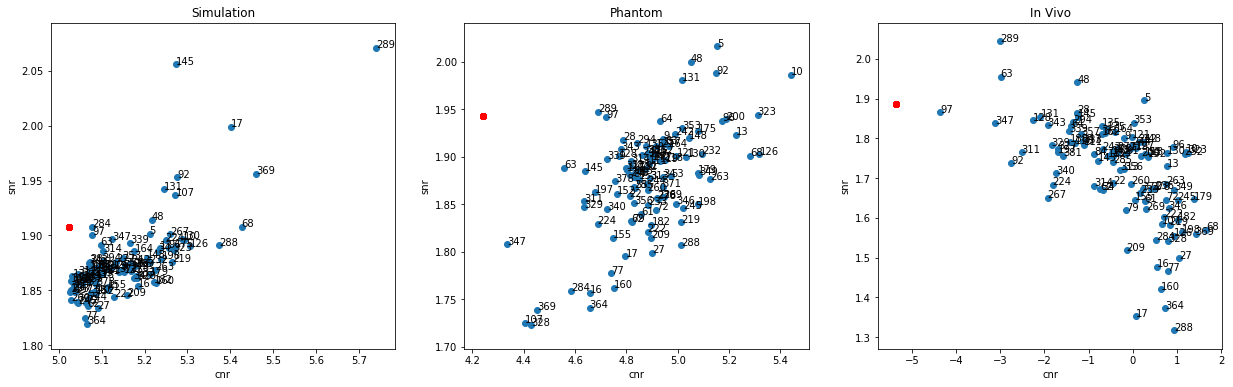

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Simulation
axes[0].scatter(df['target_anechoic_cyst_5mm_avg_cnr_dnn'], df['target_anechoic_cyst_5mm_avg_snr_dnn'])
axes[0].scatter(df['target_anechoic_cyst_5mm_avg_cnr_das'], df['target_anechoic_cyst_5mm_avg_snr_das'], color='red')
axes[0].set_xlabel('cnr')
axes[0].set_ylabel('snr')
axes[0].set_title('Simulation')
label_point(df, 'target_anechoic_cyst_5mm_avg_cnr_dnn', 'target_anechoic_cyst_5mm_avg_snr_dnn', axes[0])

# Phantom
axes[1].scatter(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'], df['target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn'])
axes[1].scatter(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_das'], df['target_phantom_anechoic_cyst_2p5mm_avg_snr_das'], color='red')
axes[1].set_xlabel('cnr')
axes[1].set_ylabel('snr')
axes[1].set_title('Phantom')
label_point(df, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn', 'target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn', axes[1])

# In Vivo
axes[2].scatter(df['target_in_vivo_avg_cnr_dnn'], df['target_in_vivo_avg_snr_dnn'])
axes[2].scatter(df['target_in_vivo_avg_cnr_das'], df['target_in_vivo_avg_snr_das'], color='red')
axes[2].set_xlabel('cnr')
axes[2].set_ylabel('snr')
axes[2].set_title('In Vivo')
label_point(df, 'target_in_vivo_avg_cnr_dnn', 'target_in_vivo_avg_snr_dnn', axes[2])




plt.show()

# Top 10s of both Phantom and In Vivo

In [10]:
in_vivo_largest_10 = df.nlargest(10, 'target_in_vivo_avg_cnr_dnn')
phantom_largest_10 = df.nlargest(10, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn')
both = df.loc[in_vivo_largest_10.index & phantom_largest_10.index]
both

input_size output_size batch_norm use_pooling pooling_method  \
68          65         130          0           1            max   
323         65         130          0           0            max   
10          65         130          1           0            max   

     conv1_kernel_size  conv1_num_kernels  conv1_stride  conv1_dropout  \
68                23.0               14.0           1.0            0.0   
323               20.0               28.0           1.0            0.0   
10                27.0               48.0           1.0            0.0   

     pool1_kernel_size                         ...                          \
68                 3.0                         ...                           
323                2.0                         ...                           
10                 3.0                         ...                           

     target_phantom_anechoic_cyst_2p5mm_avg_snr_das  \
68                                          1.94274   
323                                         1.94274   
10                                          1.94274   

     target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn  \
68                                          1.90072   
323                                         1.94400   
10                                          1.98608   

     target_phantom_anechoic_cyst_2p5mm_avg_mean_in_das  \
68                                            0.006298    
323                                           0.006298    
10                                            0.006298    

     target_phantom_anechoic_cyst_2p5mm_avg_mean_in_dnn  \
68                                            0.001657    
323                                           0.002305    
10                                            0.002241    

     target_phantom_anechoic_cyst_2p5mm_avg_mean_out_das  \
68                                            0.041309     
323                                           0.041309     
10                                            0.041309     

     target_phantom_anechoic_cyst_2p5mm_avg_mean_out_dnn  \
68                                            0.054057     
323                                           0.048476     
10                                            0.043876     

     target_phantom_anechoic_cyst_2p5mm_avg_var_in_das  \
68                                            0.000009   
323                                           0.000009   
10                                            0.000009   

     target_phantom_anechoic_cyst_2p5mm_avg_var_in_dnn  \
68                                            0.000004   
323                                           0.000004   
10                                            0.000005   

     target_phantom_anechoic_cyst_2p5mm_avg_var_out_das  \
68                                            0.000454    
323                                           0.000454    
10                                            0.000454    

     target_phantom_anechoic_cyst_2p5mm_avg_var_out_dnn  
68                                            0.000817   
323                                           0.000631   
10                                            0.000492   

[3 rows x 249 columns]

model 1 of 3 :  20180928201821_31_evaluated


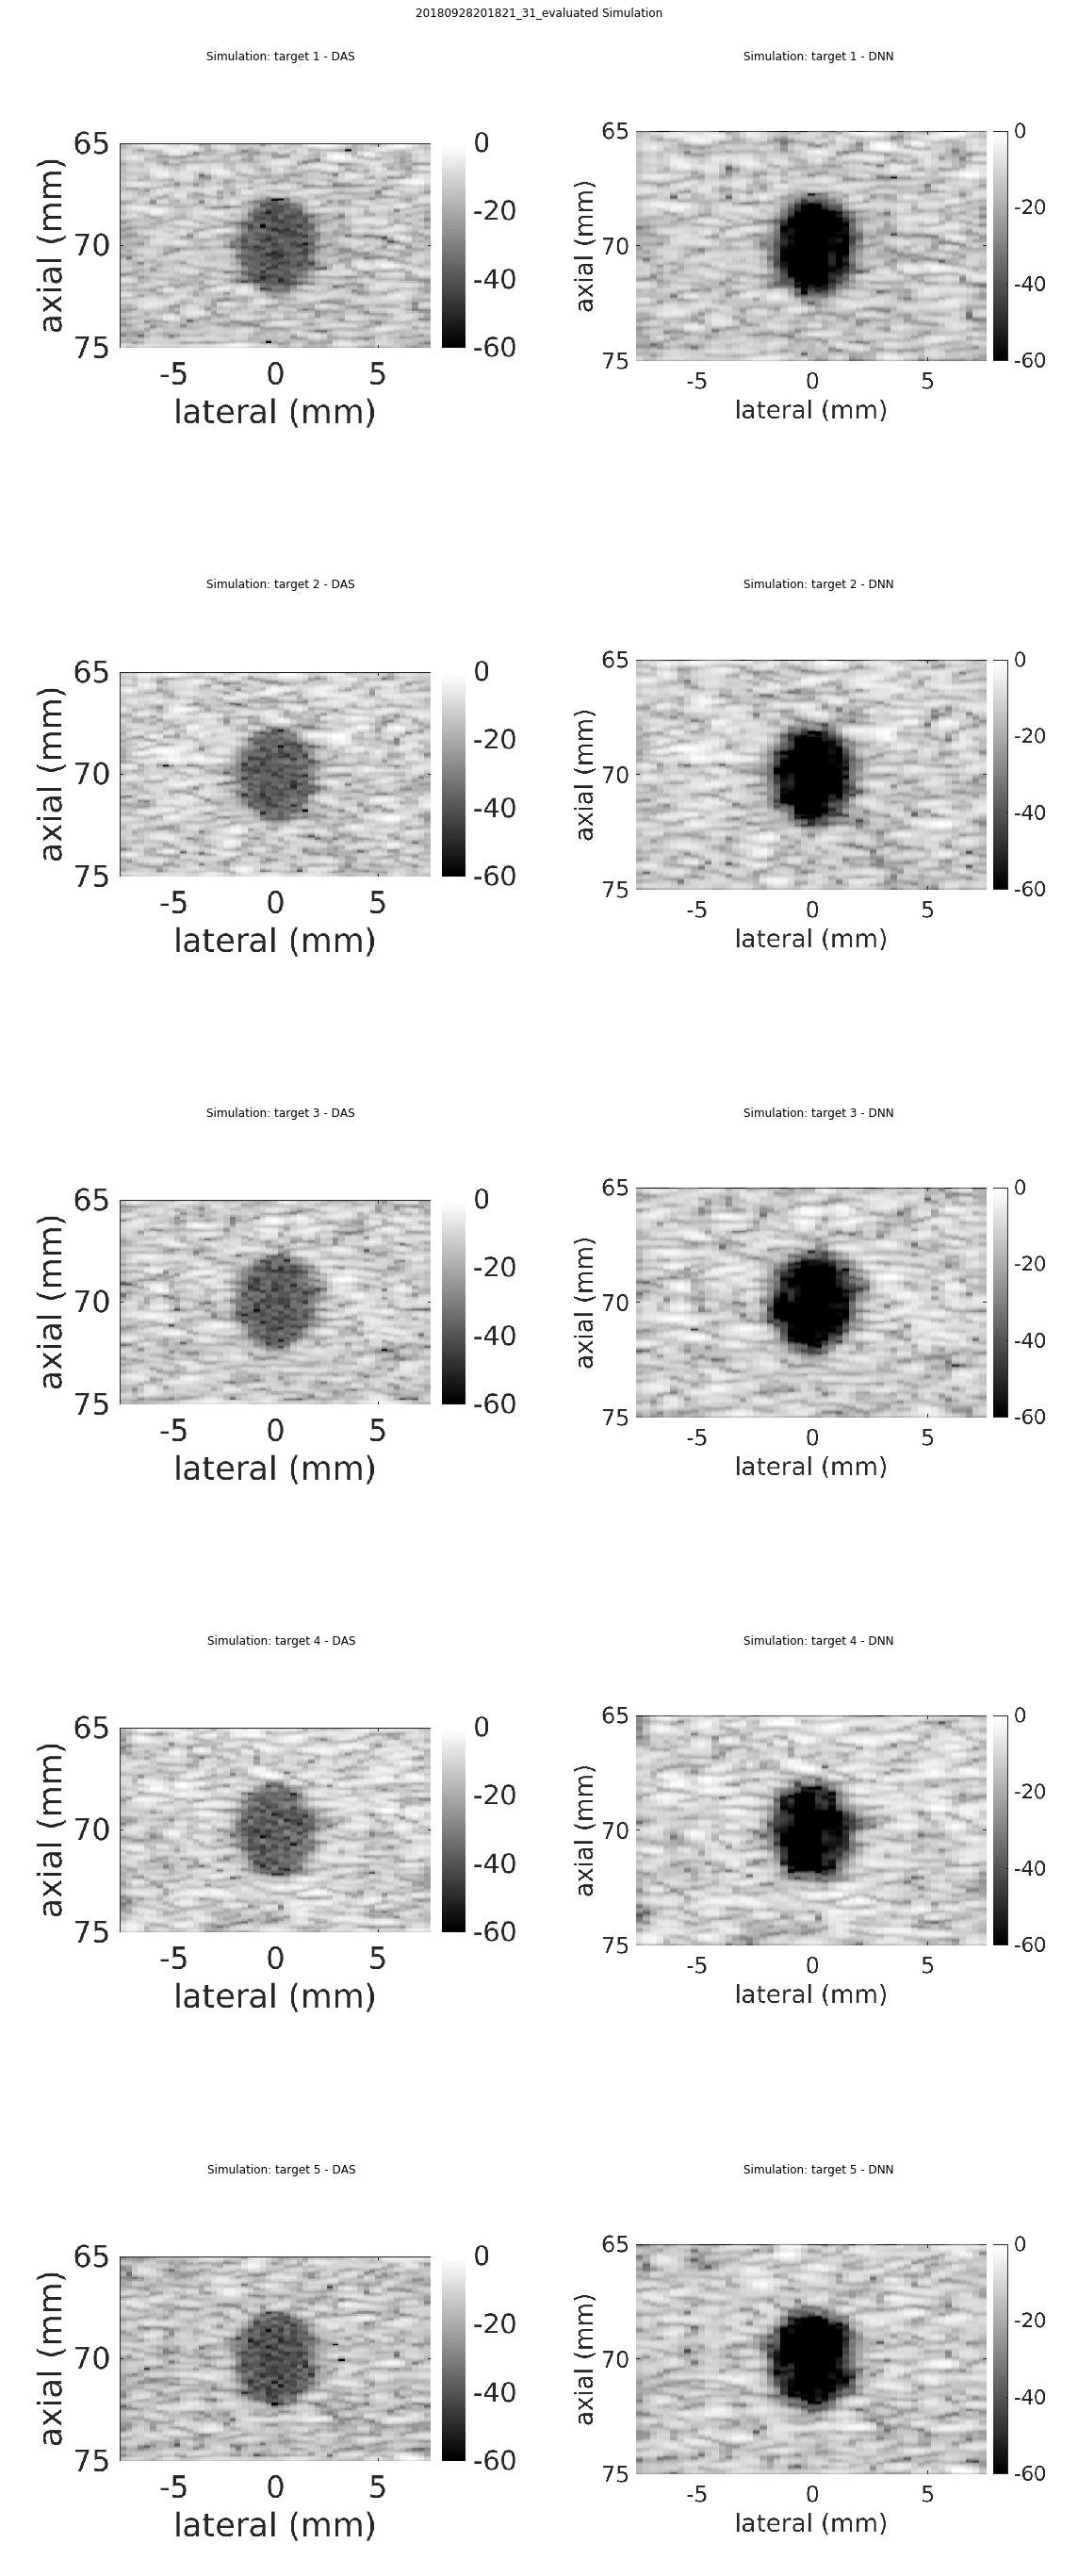

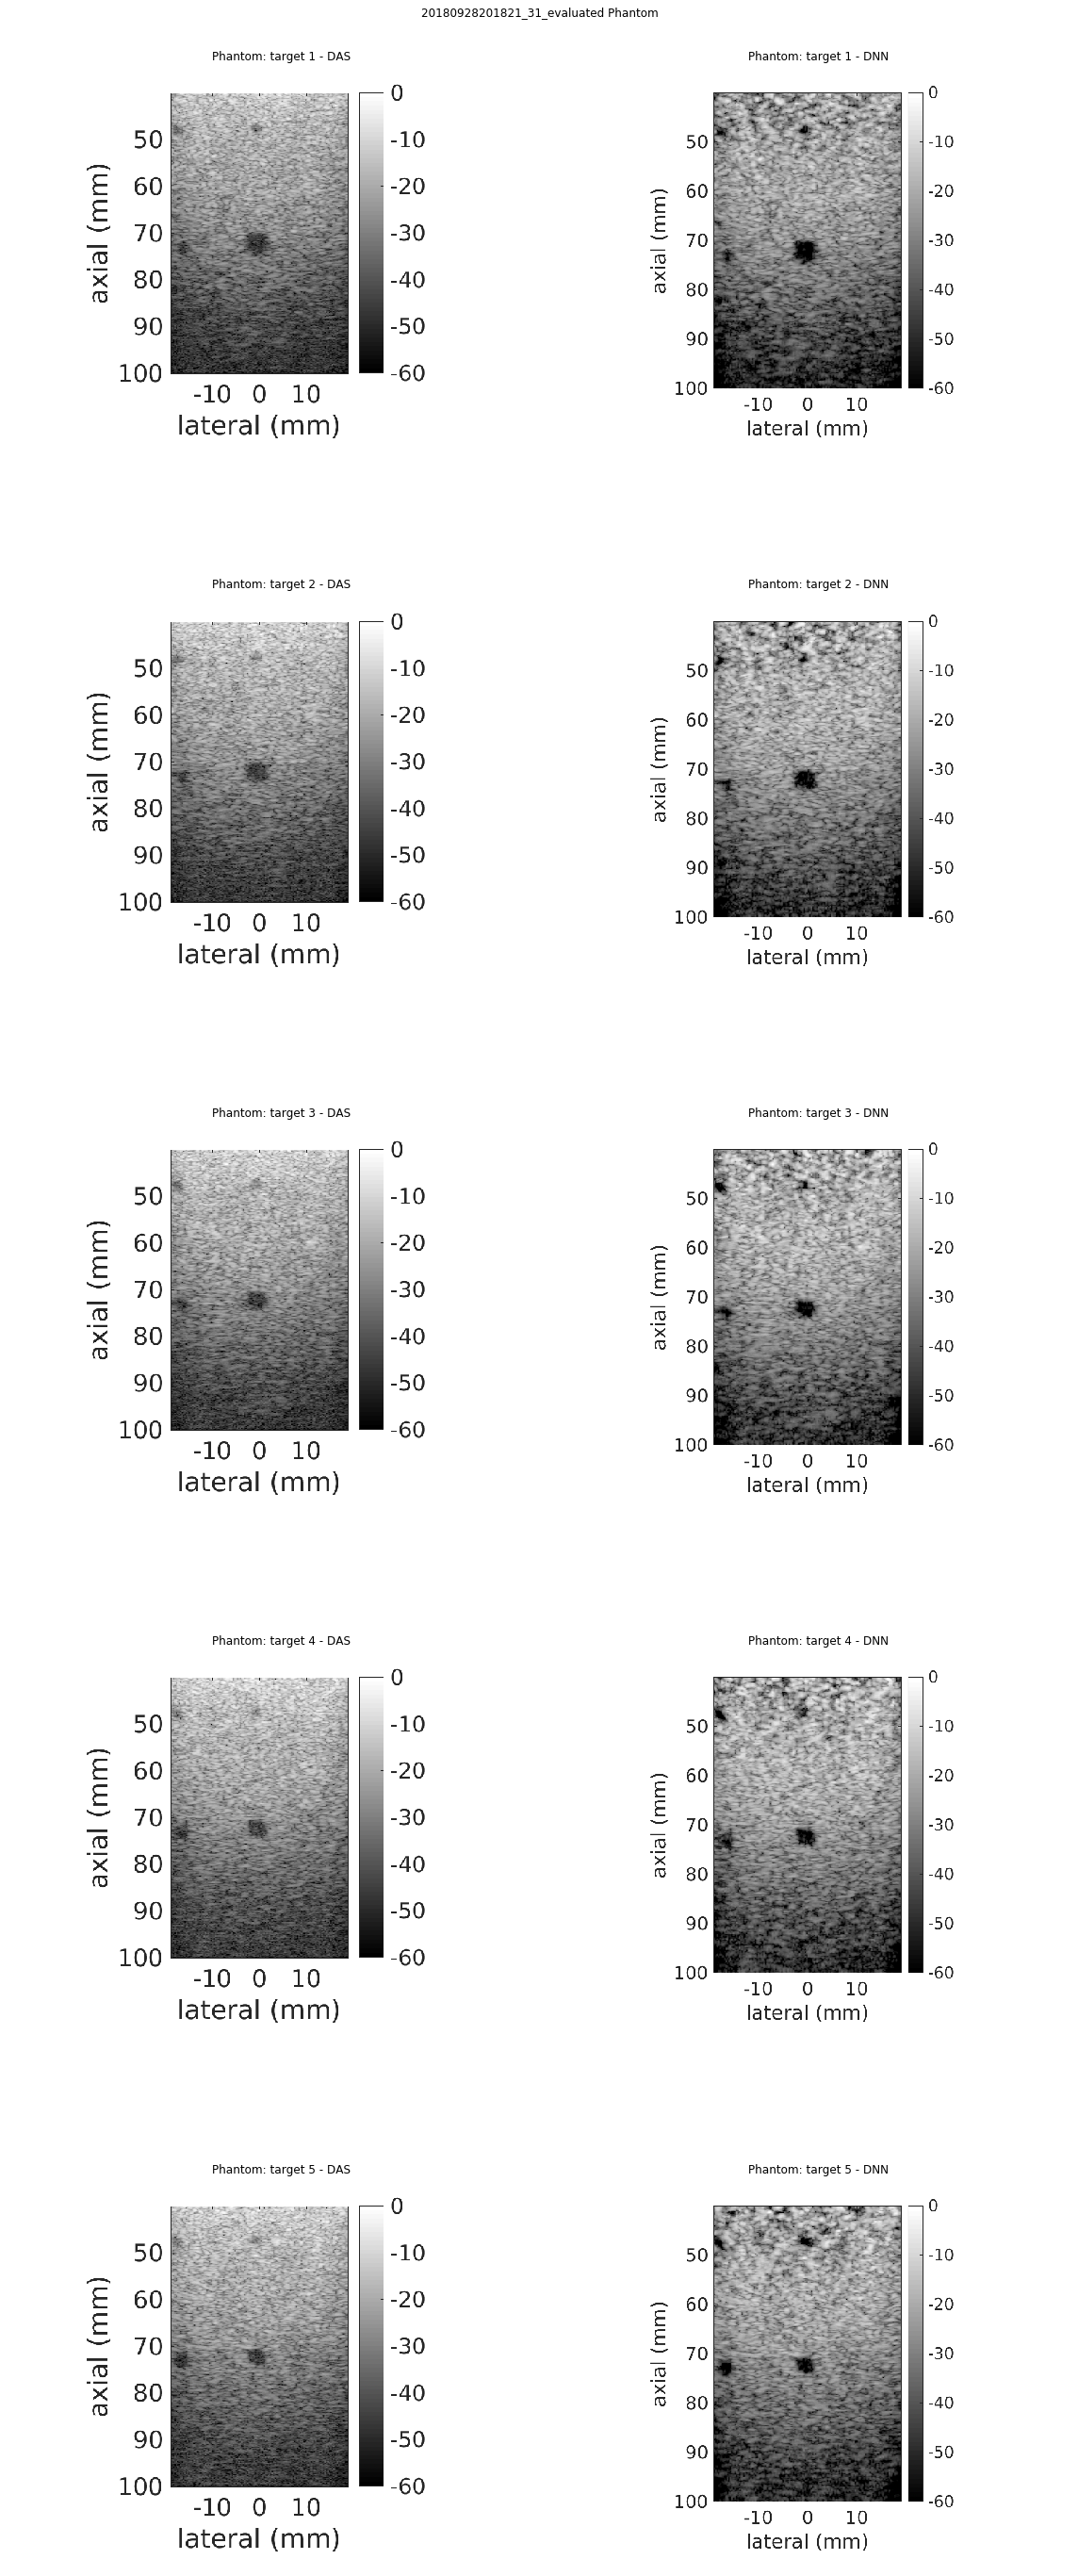

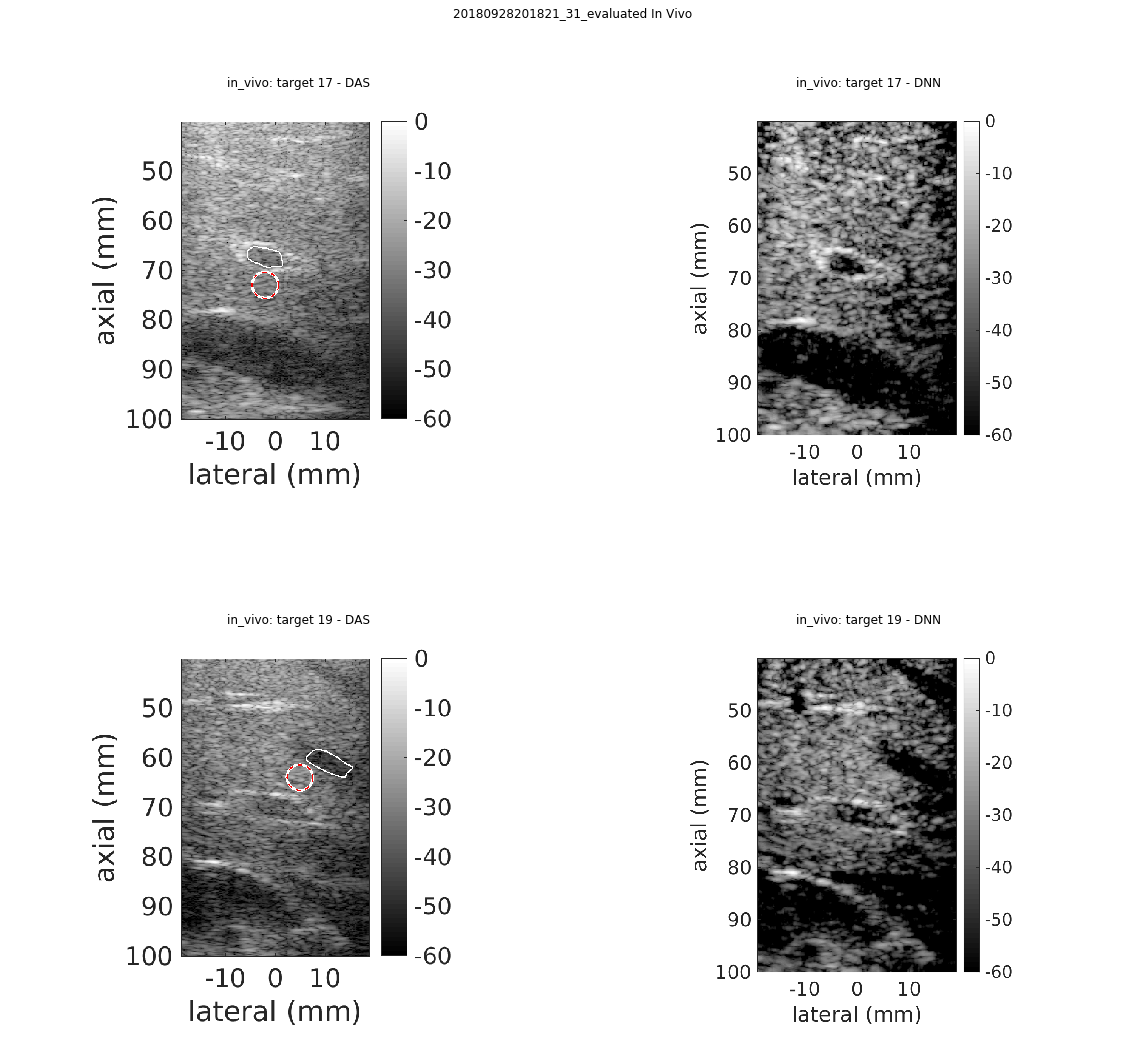


model 2 of 3 :  20180801163205_9_evaluated


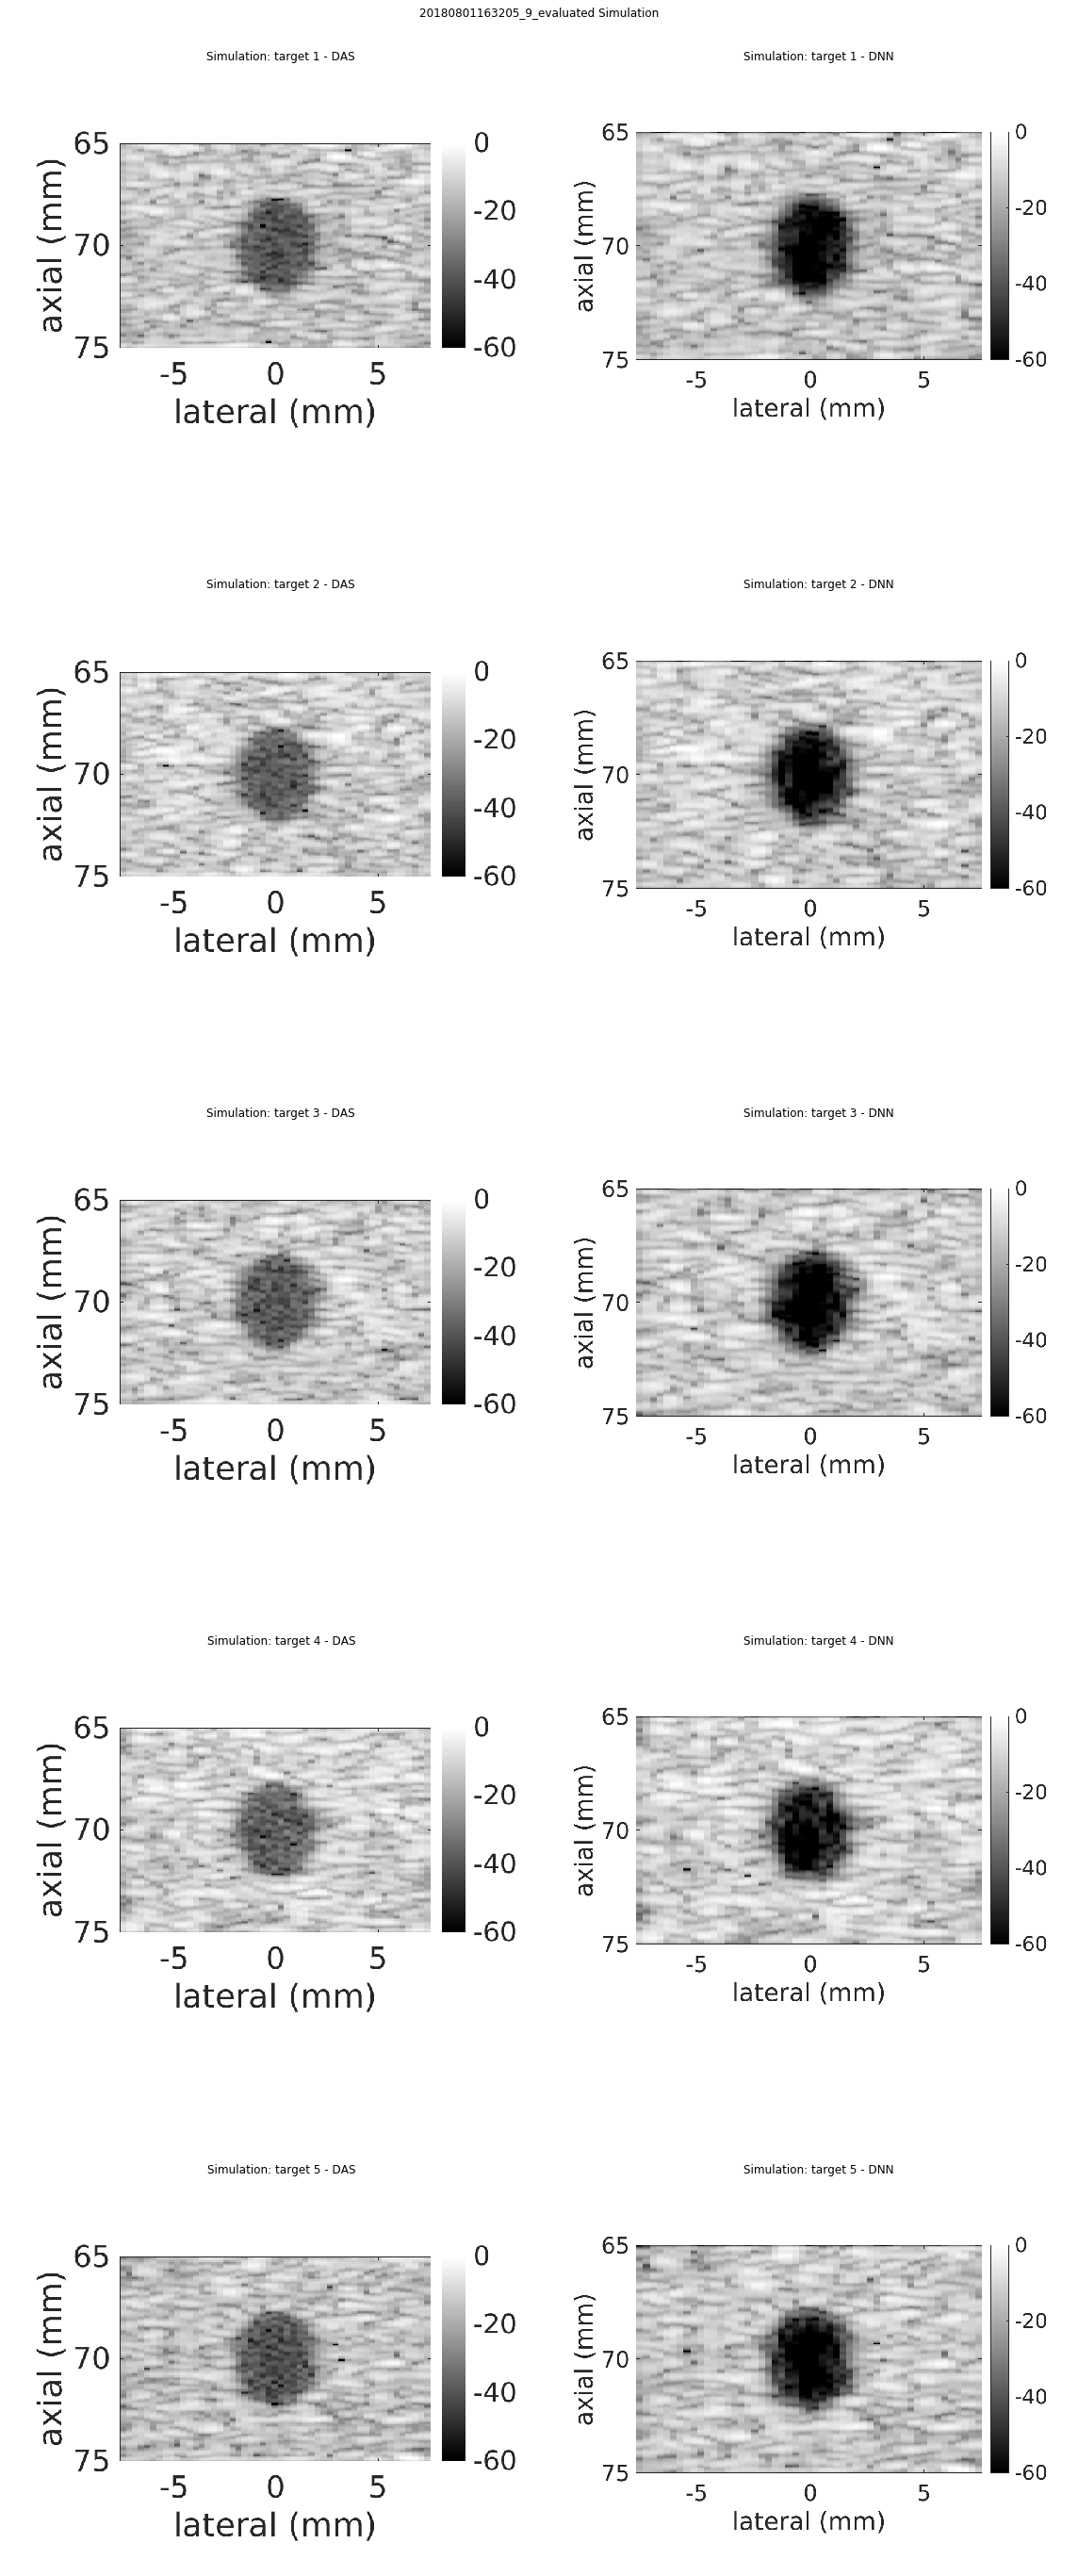

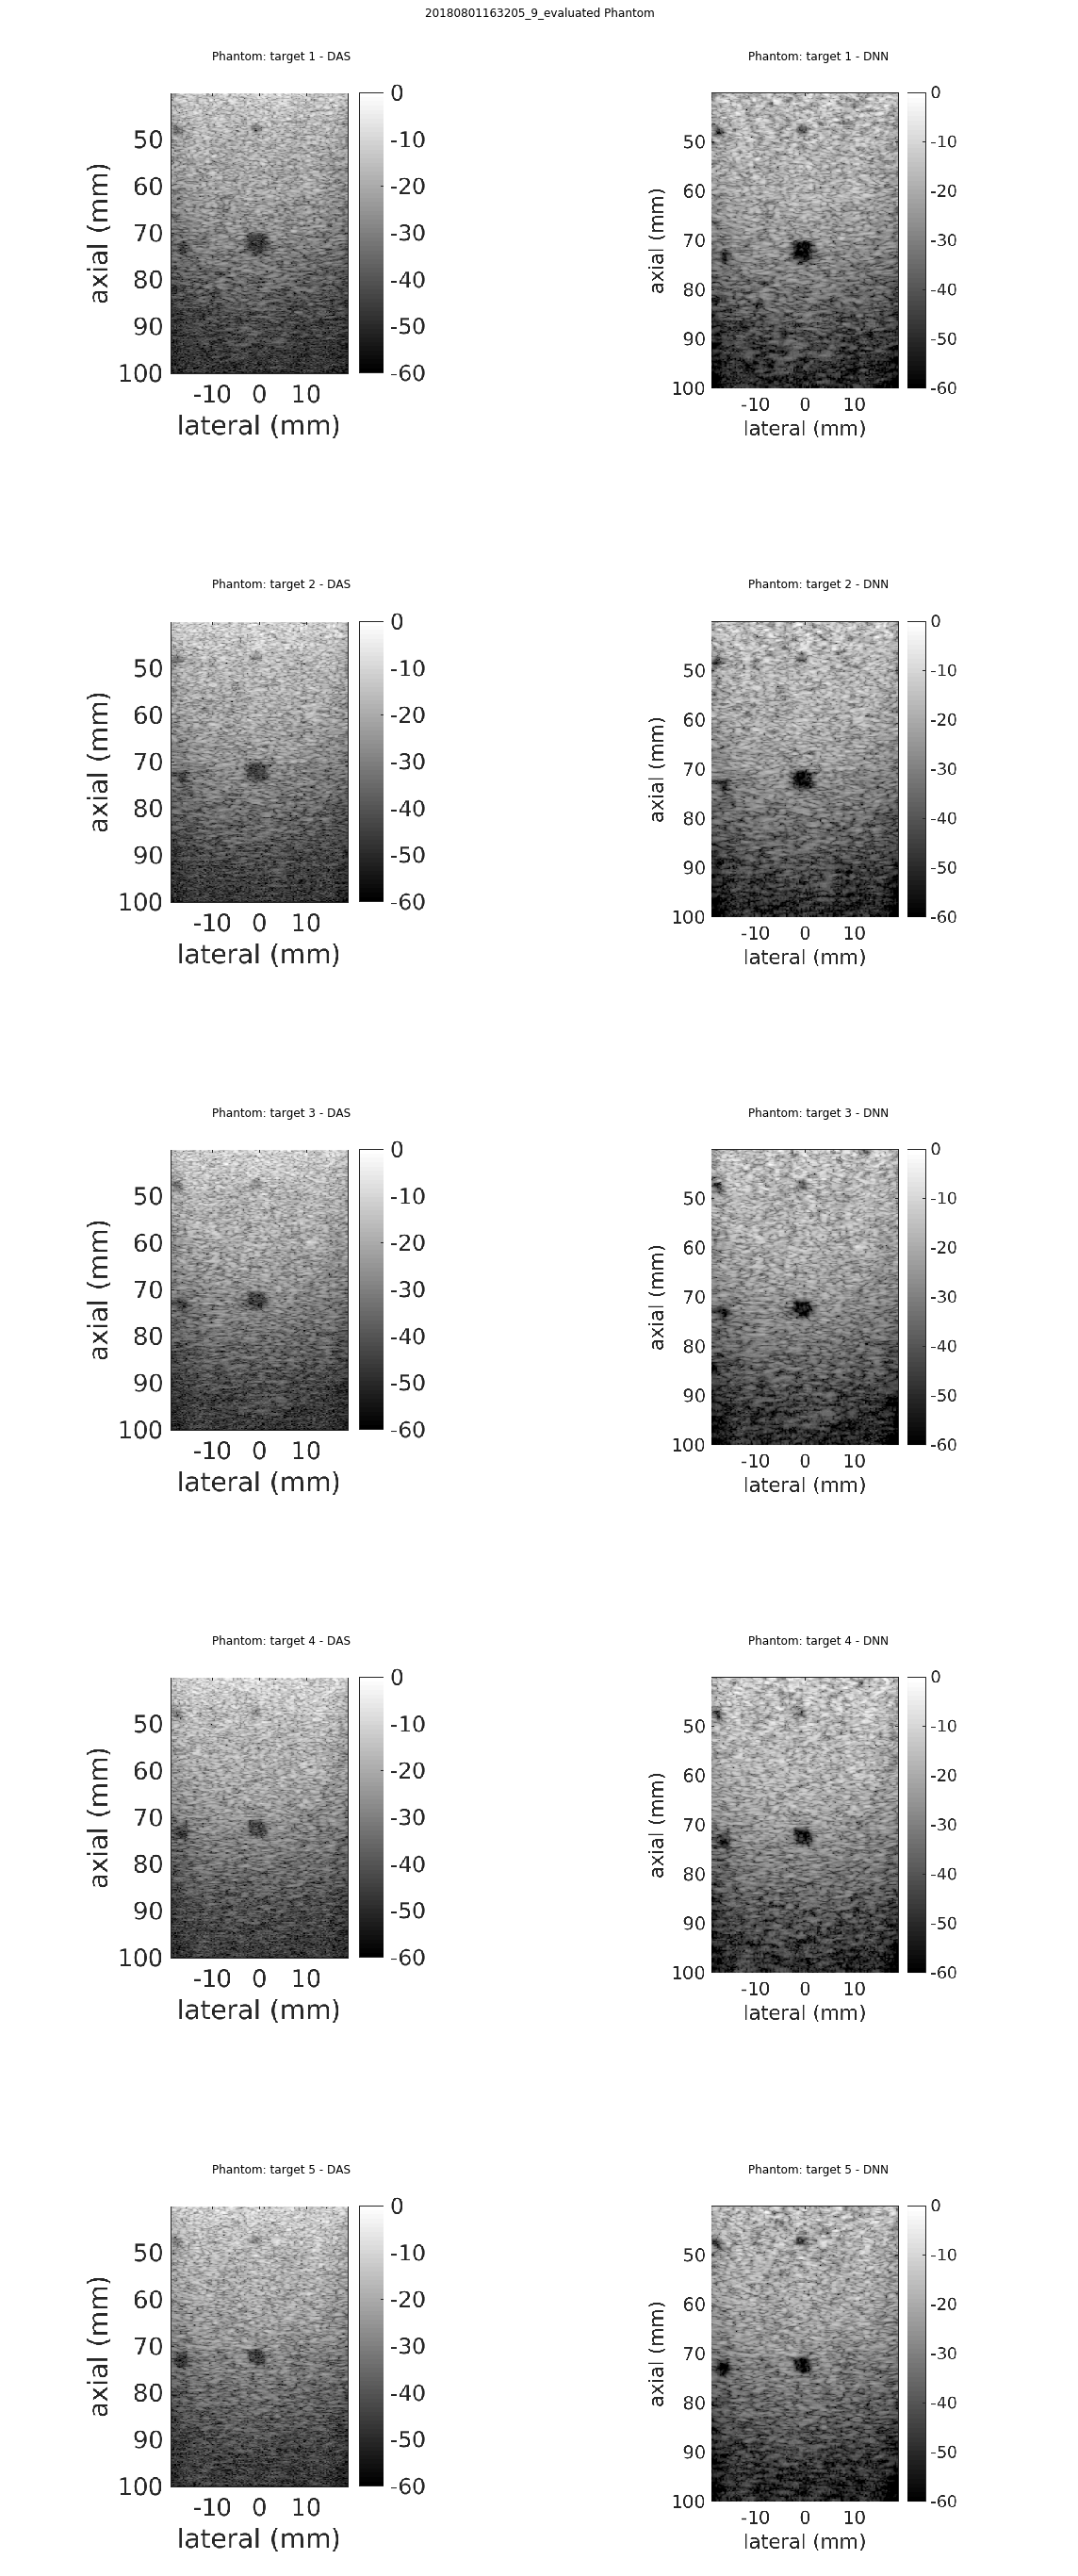

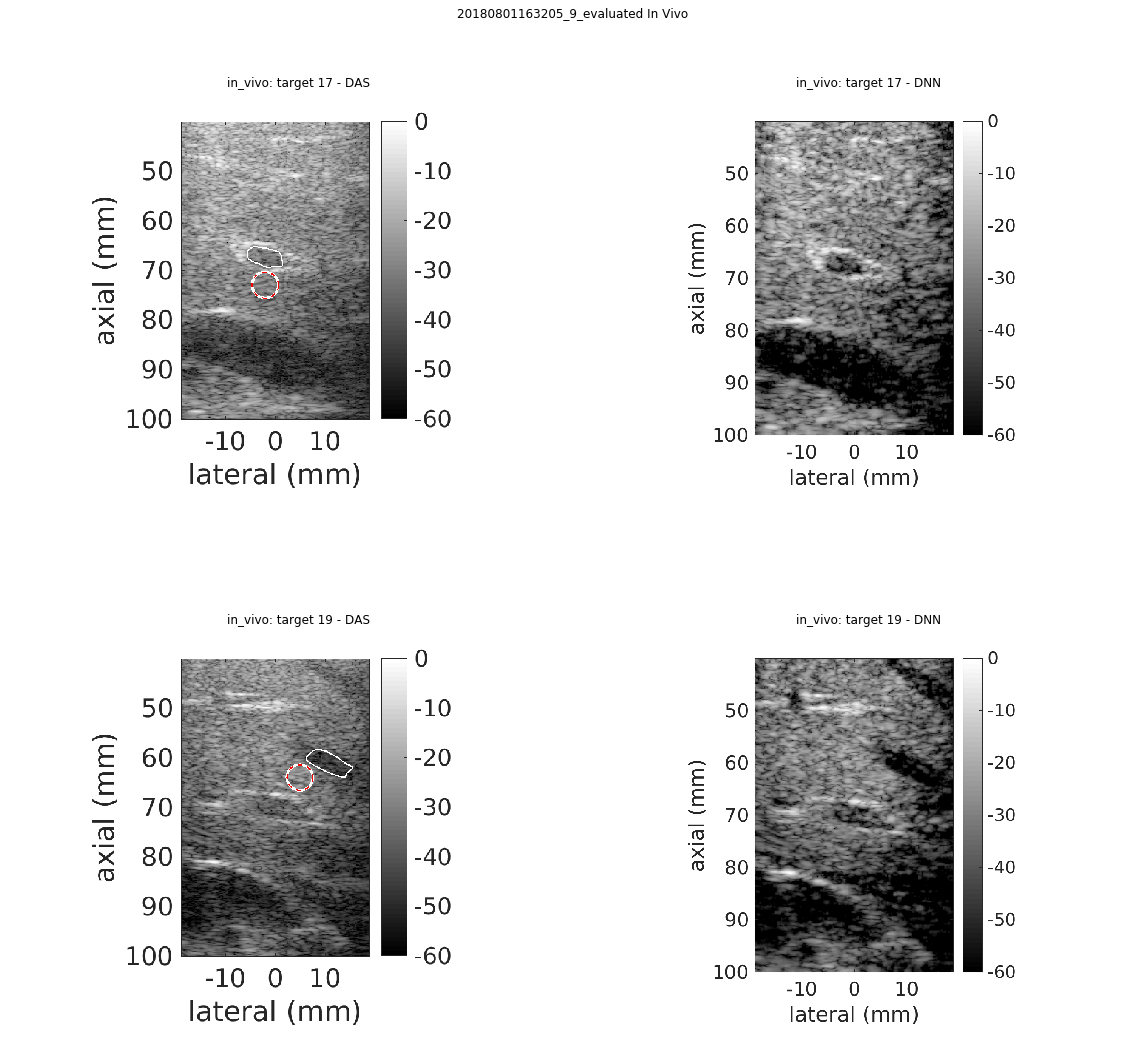


model 3 of 3 :  20180928201821_37_evaluated


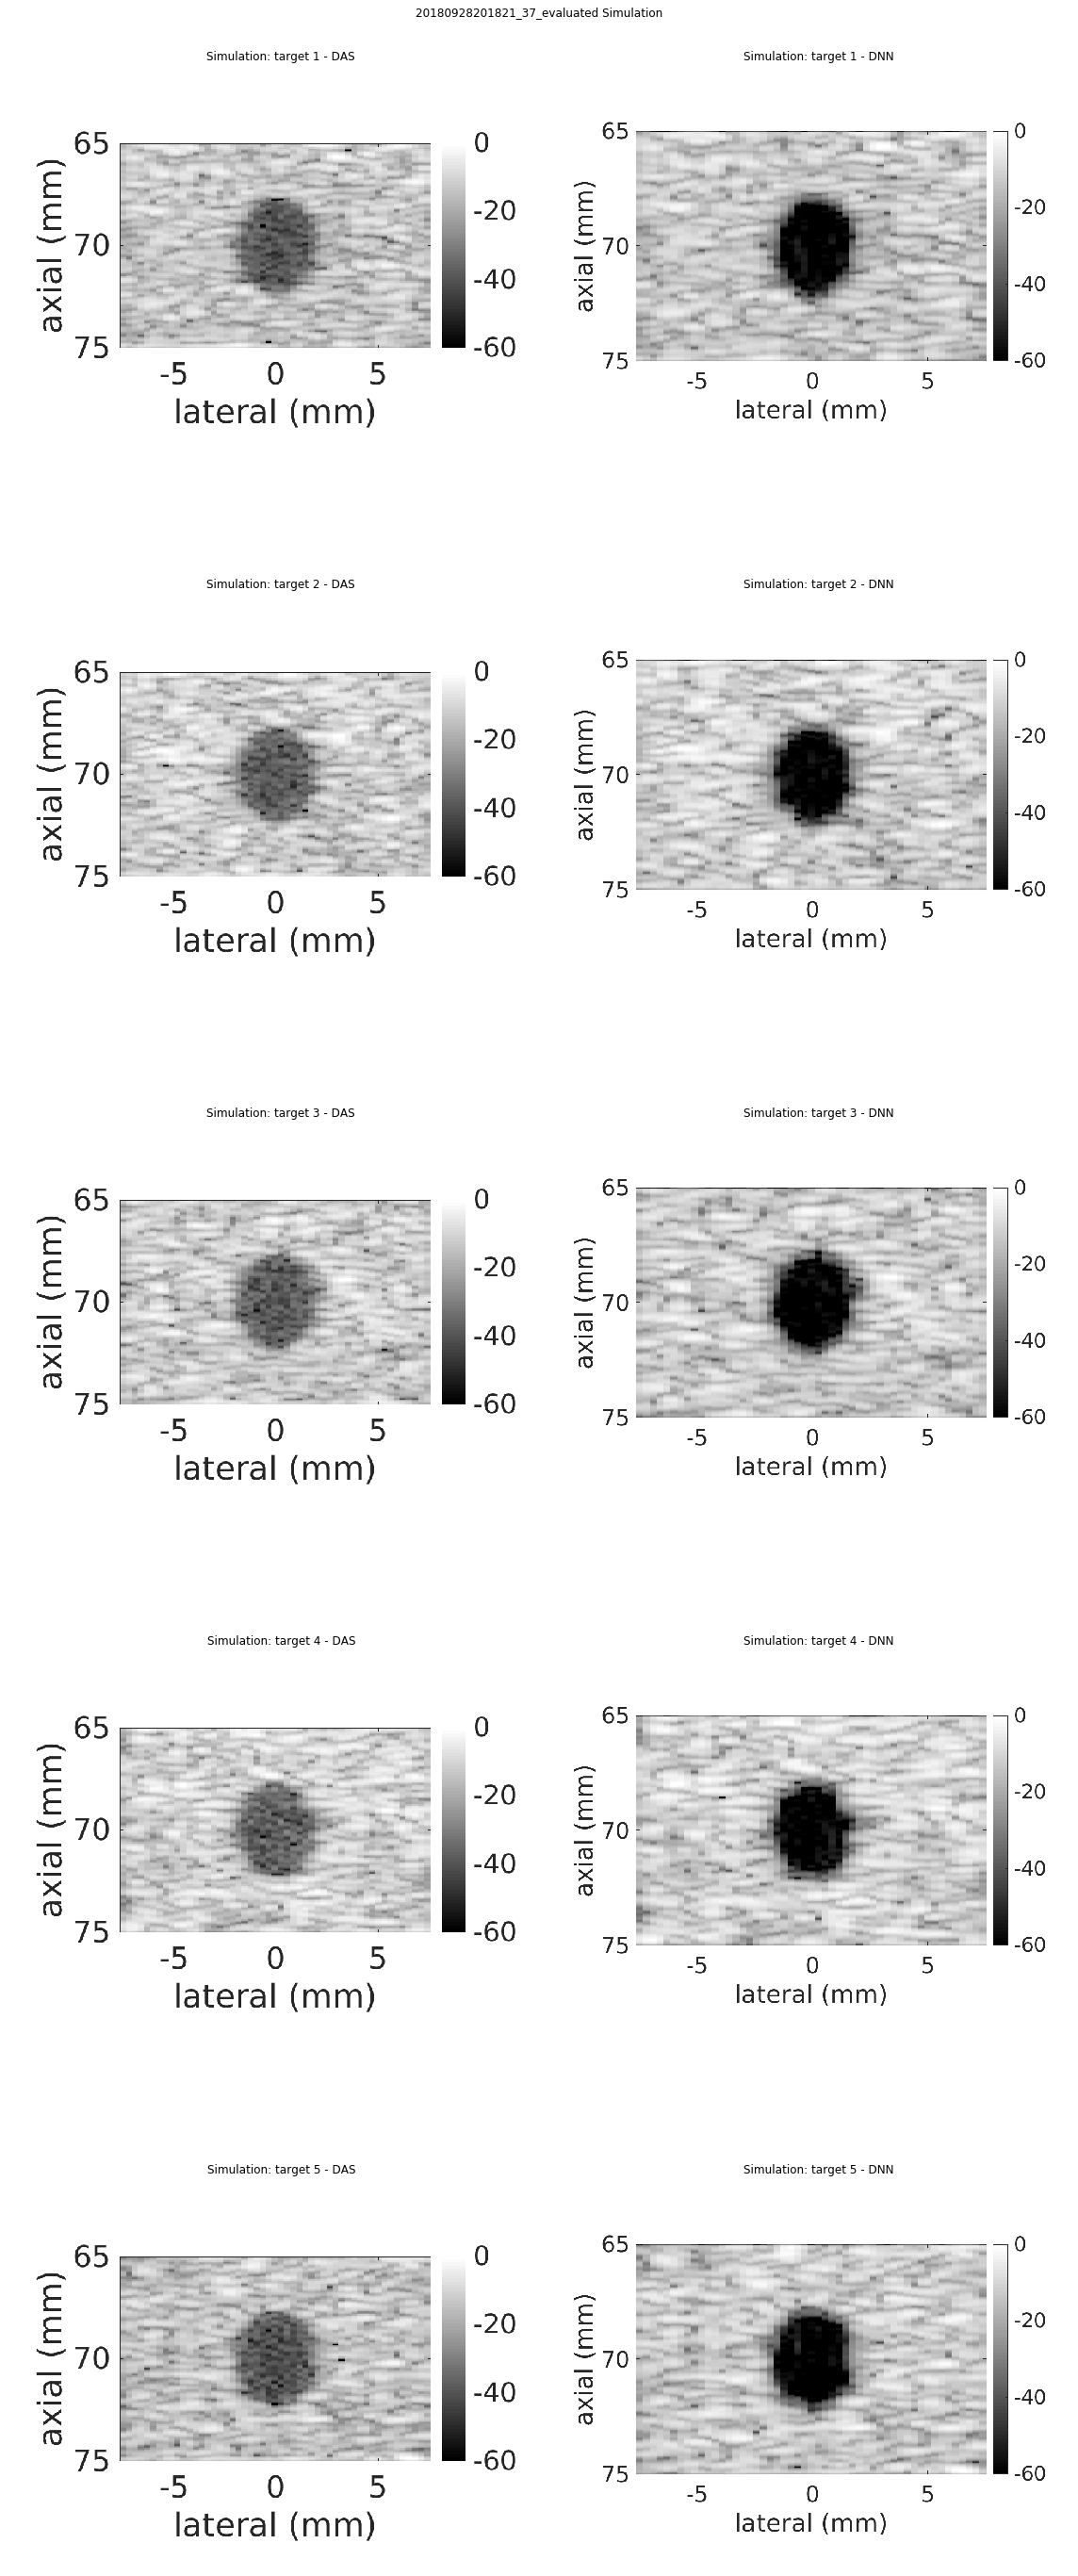

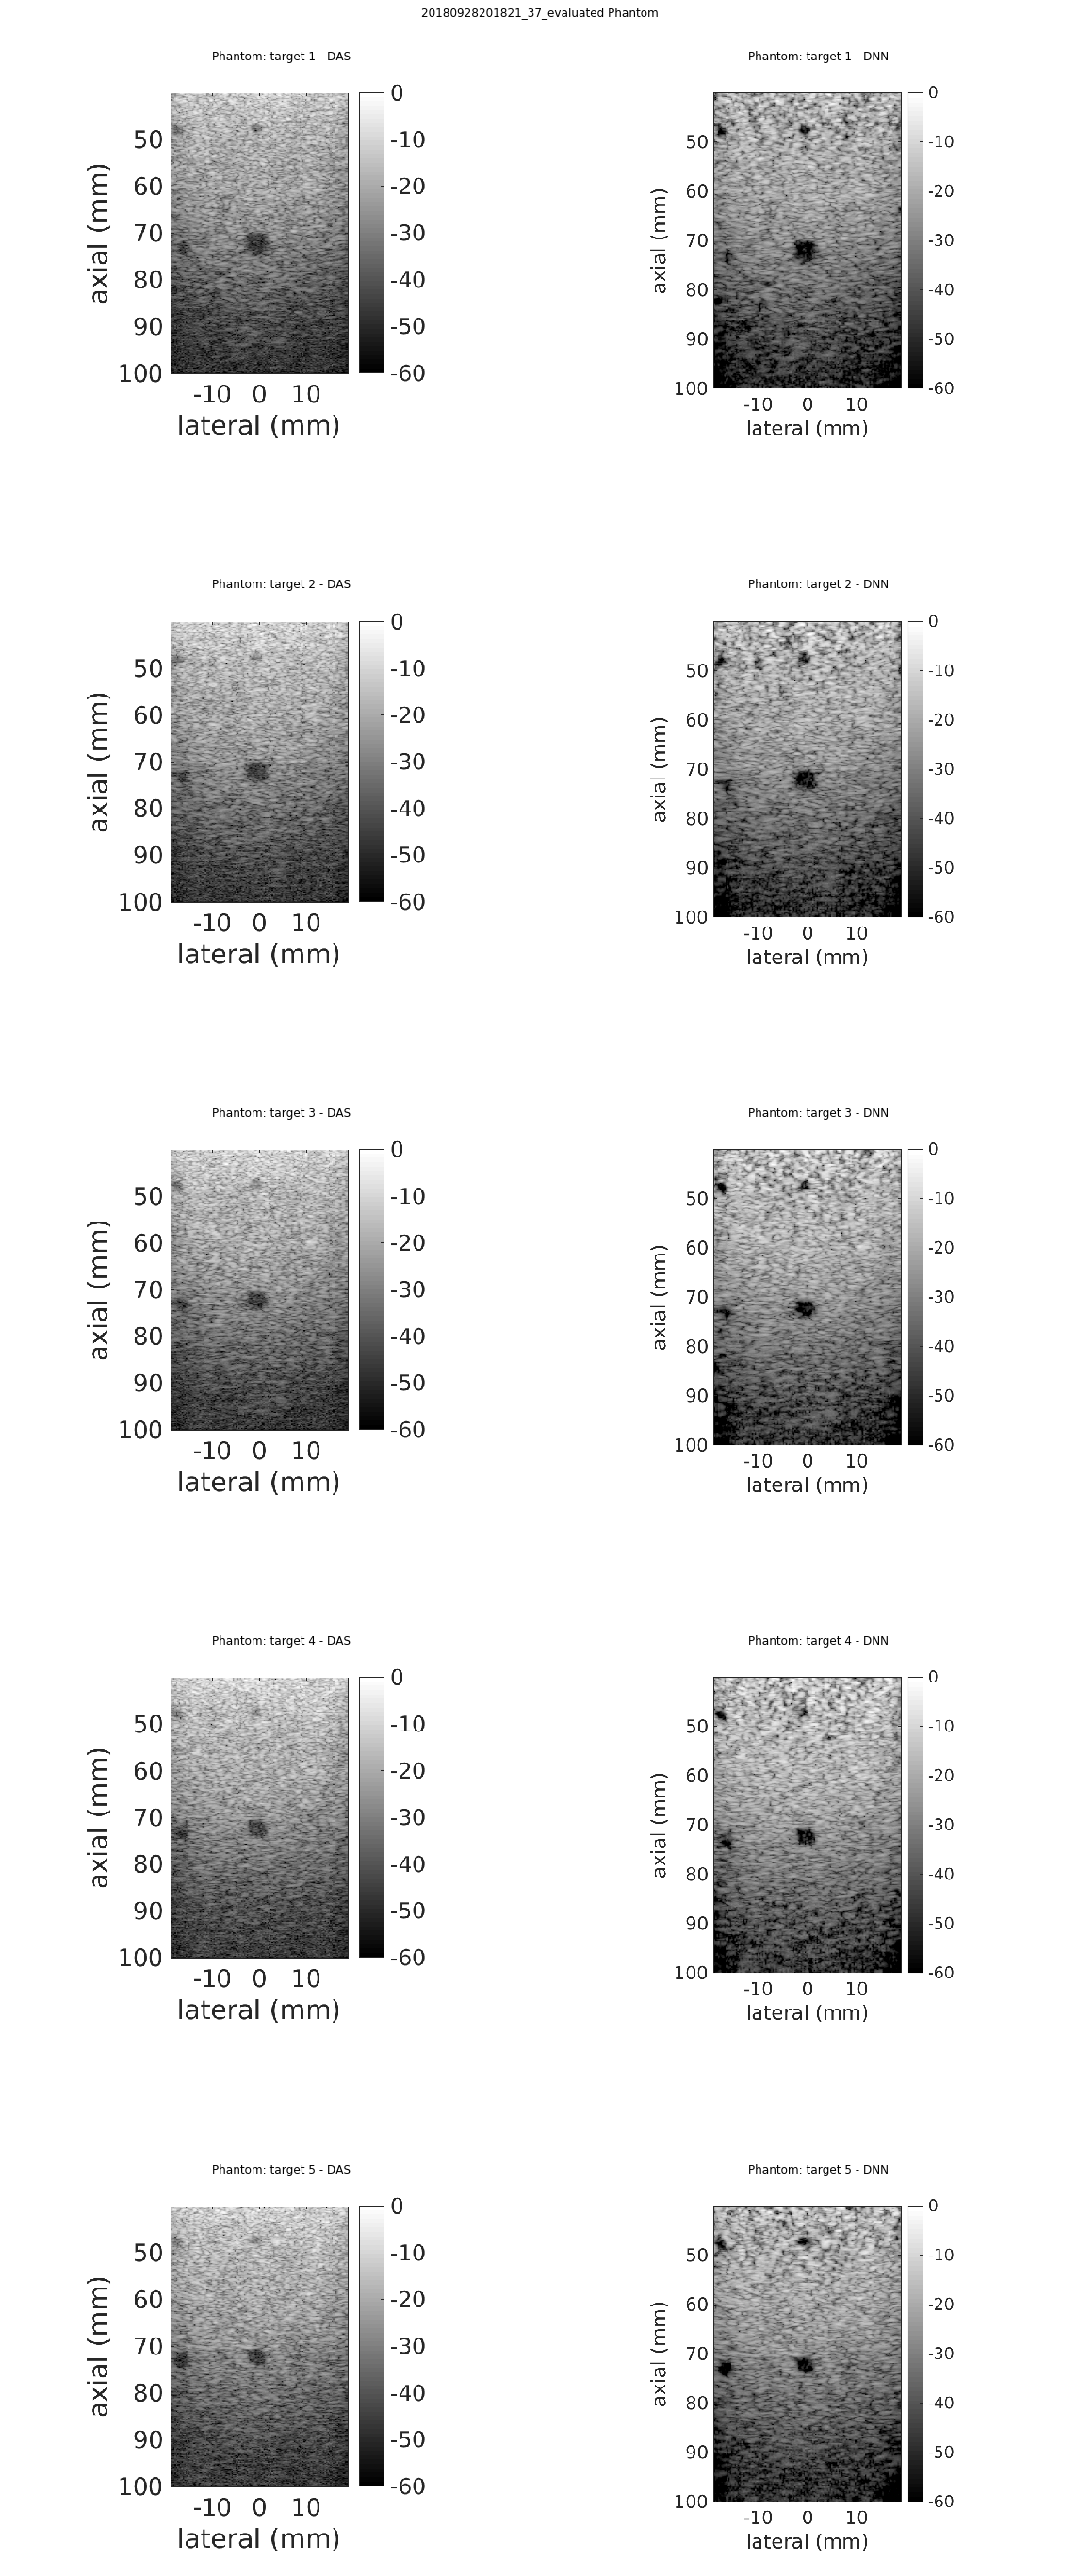

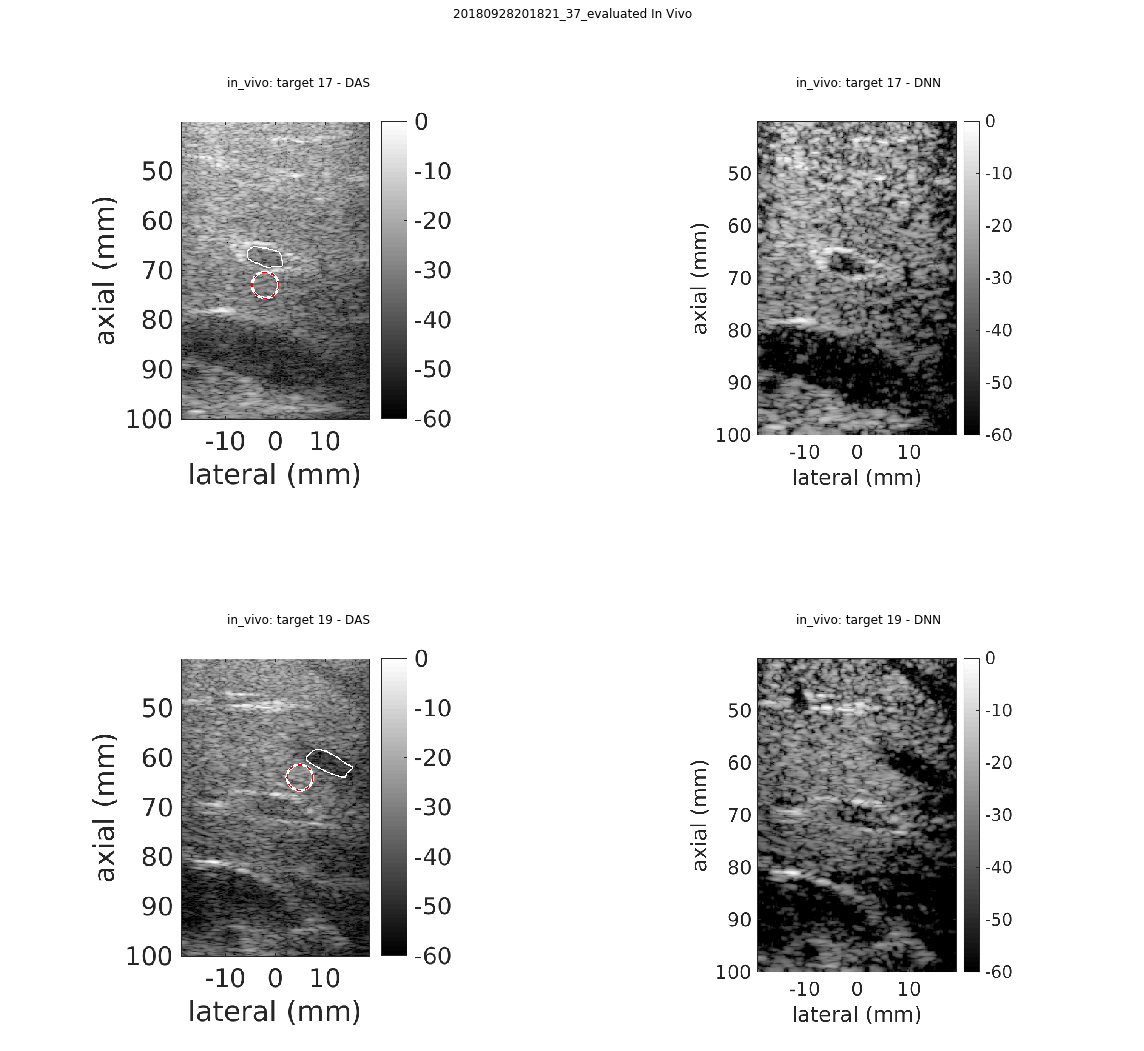

In [11]:
import os

df_to_inspect = both
for index, model_name in enumerate(df_to_inspect['name']):
    model_folder = os.path.join('..', 'DNNs', model_name)
    print('model', index+1, 'of', len(df_to_inspect), ': ', model_name)
    inspect_model_by_name(model_folder)
    print()

In [17]:
display(both.loc[:, 'fcs_num_hidden_layers'])

68     2.0
323    3.0
10     2.0
Name: fcs_num_hidden_layers, dtype: float64

In [13]:
# Hyperparameters to look at

hyperparams = [ \
 'name',

 'batch_norm',
 'use_pooling',
 'conv1_kernel_size',
 'conv1_num_kernels',
 'conv1_stride',
#  'conv1_dropout',
               
 'pool1_kernel_size',
 'pool1_stride',
               
 'conv2_kernel_size',
 'conv2_num_kernels',
 'conv2_stride',
 'conv2_dropout',
               
 'pool2_kernel_size',
 'pool2_stride',
               
 'fcs_hidden_size',
 'fcs_dropout',
 'fcs_num_hidden_layers',
               
               
#  'data_is_target',
 'data_noise_gaussian',
#  'data_train',
#  'data_val',
#  'k',
#  'patience',
#  'save_initial',
#  'weight_decay',
#  'batch_size',
#  'loss_val_k_3',
 'loss_val_k_4',
#  'loss_val_k_5',
          
 'learning_rate',
 'optimizer',
#  'momentum',
]



# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))


In [14]:
both[hyperparams]

name batch_norm use_pooling  conv1_kernel_size  \
68   20180928201821_31_evaluated          0           1               23.0   
323   20180801163205_9_evaluated          0           0               20.0   
10   20180928201821_37_evaluated          1           0               27.0   

     conv1_num_kernels  conv1_stride  pool1_kernel_size  pool1_stride  \
68                14.0           1.0                3.0           2.0   
323               28.0           1.0                2.0           2.0   
10                48.0           1.0                3.0           2.0   

     conv2_kernel_size  conv2_num_kernels    ...      conv2_dropout  \
68                18.0               32.0    ...           0.523597   
323                2.0               33.0    ...           0.094662   
10                14.0               29.0    ...           0.561118   

     pool2_kernel_size  pool2_stride  fcs_hidden_size  fcs_dropout  \
68                 2.0           2.0            276.0     0.275821   
323                2.0           2.0            277.0     0.347262   
10                 2.0           2.0            194.0     0.902814   

     fcs_num_hidden_layers  data_noise_gaussian loss_val_k_4  learning_rate  \
68                     2.0                    1     0.009885       0.000067   
323                    3.0                    1     0.002740       0.000058   
10                     2.0                    0     0.061304       0.000164   

     optimizer  
68        Adam  
323       Adam  
10        Adam  

[3 rows x 21 columns]